In [1]:
using Revise
using PrevisibilityCrawler
using StatsBase, RollingFunctions
pc = PrevisibilityCrawler;

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/PrevisibilityCrawler/O5sra.ji for PrevisibilityCrawler [4e7a9092-97af-11e9-31ee-edeee8018202]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3899002672774823118\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5128118553062506038\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3899002672774823118\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [12]:
using CSV
ticks = CSV.read("ticks.csv");

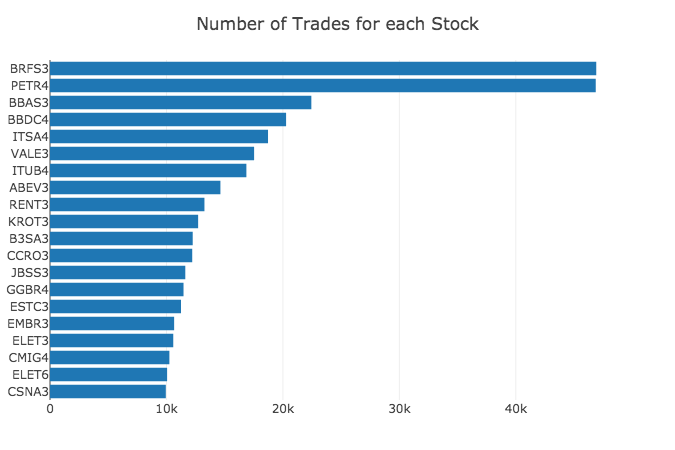

In [19]:
trace = pty.bar(y=ticks.InstrumentSymbol[20:-1:1], x=ticks.Trades[20:-1:1], orientation='h')
pty.plot([trace], pty.Layout(title="Number of Trades for each Stock"))

In [5]:
windowsize = 15
rmae(predicted, y) = mae(predicted, y)/mean(abs.(y))
modelloss = rmae;
explainedmae(loss, prevy, datasetsize) =  (length(prevy)/datasetsize)*0.1 + (1 - loss)
prevloss = explainedmae;
minsamples=100
model = BicLassoModel();
pipe = Pipeline(model, modelloss);
algo = Algorithm(prevloss, minsamples=minsamples, k=3)
evolsettings = EvolSettings(;pressure=2, mutation_p=10, crossover_p=80, elitism=1);
gasettings = GA(2000;minsamples=minsamples, groupsize=40);

# signal =   [ar1(200);wn2(900);wn(900+windowsize, 6)]
# x, y, reference10 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr10 = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference10);

# signal =   [ar1(400);wn2(800);wn(800+windowsize, 6)]
# x, y, reference20 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr20h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference20);

# signal =   [ar1(600);wn2(700);wn(700+windowsize, 6)]
# x, y, reference30 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr30restart = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference30, restart=[51]);

# signal =   [ar1(600);wn2(700);wn(700+windowsize, 6)]
# x, y, reference30 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr30 = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference30);

signal =   [ar1(600);wn2(700);wn(700+windowsize, 6)]
x, y, reference30 = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe)
snr30 = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference30);

# signal =   [ar1(800);wn2(600);wn(600+windowsize, 6)]
# x, y, reference40 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr40h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference40);

# signal =   [ar1(1000);wn2(500);wn(500+windowsize, 6)]
# x, y, reference50 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr50h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference50);

# signal =   [ar1(1400);wn2(300);wn(300+windowsize, 6)]
# x, y, reference70 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr70h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference70);

# signal =   [ar1(1800);wn2(100);wn(100+windowsize, 6)]
# x, y, reference90 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr90h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference90);

# signal =   ar1(2000+windowsize)
# x, y, reference100 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe)
# snr100h = benchmark(100, 100, init_genes, scorefunction, gasettings, evolsettings, knn=5, reference=reference100);

Computing...100%|███████████████████████████████████████| Time: 0:22:39


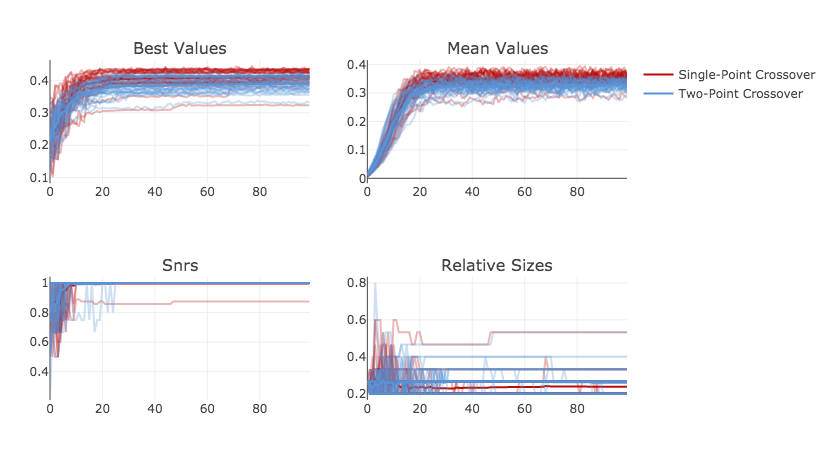

In [6]:
compare_states(snr30, snr2p30, "Single-Point Crossover", "Two-Point Crossover")

In [7]:
df = getmetrics(snr30, "Single-Point Crossover")
df = getmetrics(snr2p30, "Two-Point Crossover", df)

2×5 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ Configuration          │ AverageMeanValue │ AverageBestValue │
│     │ String                 │ Float64          │ Float64          │
├─────┼────────────────────────┼──────────────────┼──────────────────┤
│ 1   │ Single-Point Crossover │ 0.349411         │ 0.412669         │
│ 2   │ Two-Point Crossover    │ 0.325688         │ 0.389682         │

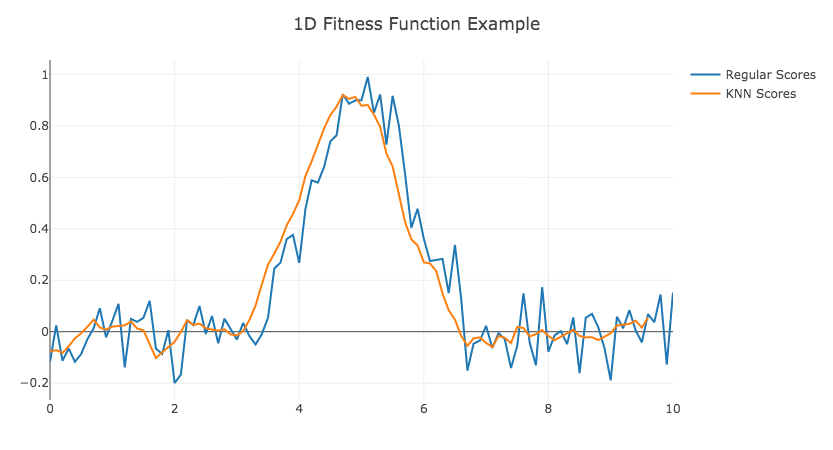

In [64]:
using Distributions
d = Normal(0, .1)
x = 0:.1:10
y = exp.(- (x.-5).^2) .+ rand(d, length(x))
ynn = rollmean(y, 5)
trace1 = pty.scatter(x=x, y=y, name="Regular Scores")
trace2 = pty.scatter(x=x, y=ynn, name="KNN Scores")

pty.plot([trace1, trace2], pty.Layout(title="1D Fitness Function Example" ))

In [150]:
windowsize = 15
# signal = ar1(2000+windowsize)
# signal = [ar1(1800);wn2(100);wn(100+windowsize, 6)]
# signal = [ar1(1400);wn2(300);wn(300+windowsize, 6)]
# signal = [ar1(1000);wn2(500);wn(500+windowsize, 6)]
# signal = [ar1(800);wn2(600);wn(600+windowsize, 6)]
# signal = [ar1(600);wn2(700);wn(700+windowsize, 6)]
signal = [ar1(400);wn2(800);wn(800+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
explainedmae(loss, prevy, datasetsize) =  (length(prevy)/datasetsize)*0.1 + (1 - loss)
prevloss = explainedmae;
modelloss = rmae
lasso = BicLassoModel();
param = ["max_depth"=>2, "eta"=>.1, "subsample"=>1, "objective"=>"reg:linear"]
xgb = XgBoostModel(Dict(:param => param, :nr_round => 10));
model = lasso;
pipe = Pipeline(model, modelloss);
algo = Algorithm(prevloss, minsamples=100, k=3);
scorefunction = training(x, y, algo, pipe);
sizes = 10:10:2000; snrs = .1:.1:1
xp, yp, zp = random_points(2000, sizes, snrs, reference, scorefunction);

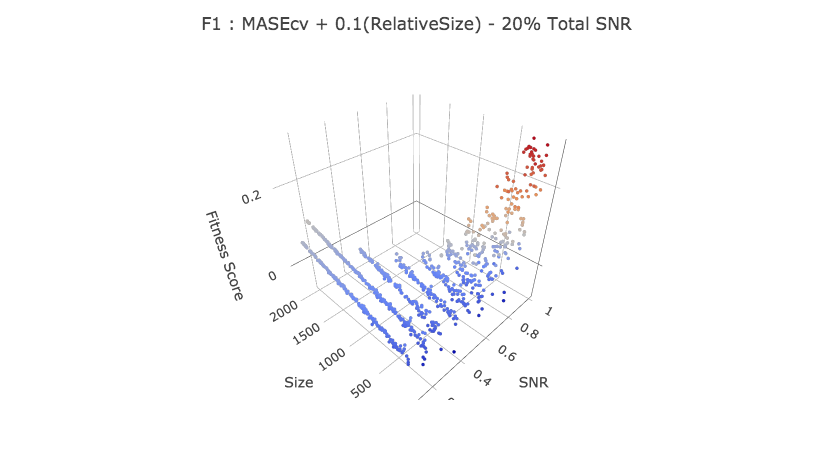

In [ ]:
marker= pty.attr(color=zp, symbol="circle", size=2)
trace = pty.scatter3d(;x=xp, y=yp, z=zp, mode="markers", marker=marker);
layout = pty.Layout(title="F1 : MASEcv + 0.1(RelativeSize) - 20% Total SNR",
                    scene_xaxis_title="SNR",
                    scene_yaxis_title="Size", 
                    scene_zaxis_title="Fitness Score",
                    scene_camera_up_x=0, scene_camera_up_y=0, scene_camera_up_z=1,
                    scene_camera_eye_x=-1.25, scene_camera_eye_y=-1.25, scene_camera_eye_z=1.25,)
a = pty.plot([trace], layout)

In [39]:
windowsize = 15
signal = [ar1(600);wn2(700);wn(700+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
rmae(predicted, y) = mae(predicted, y)/mean(abs.(y))
modelloss = rmae;
explainedmae(loss, prevy, datasetsize) =  (length(prevy)/datasetsize)*0.1 + (1 - loss)
prevloss = explainedmae;
lasso = BicLassoModel();
model = lasso;
pipe = Pipeline(model, modelloss);
algo = Algorithm(prevloss, minsamples=99, k=3);
scorefunction = training(x, y, algo, pipe);
evolsettings = EvolSettings(;pressure=2, mutation_p=10, crossover_p=80, elitism=1);
gasettings = GA(size(x,1);minsamples=121, groupsize=40);
pop = init_genes(150, gasettings)
scores, kscores, state = evolution(pop, scorefunction, 2, evolsettings, "genes",reference=reference);

2-element Array{Any,1}:
 [0.0296489, 0.0166706, 0.0107563, 0.00864631, 0.00624063, -0.00817151, 0.0481499, 0.0128937, 0.00690175, -0.0297229  …  0.0124541, 0.00941196, 0.00589109, 0.0152594, -0.00837861, 0.0285023, 0.0111647, 0.00133797, 0.0099536, 0.010549]    
 [0.145367, 0.00334013, -0.00724151, -0.0110543, -0.00108161, -0.00038382, 0.0156836, -0.000181909, 0.0186393, 0.0241319  …  -0.00113538, -0.0057809, 0.0119404, 0.0251469, 0.0208762, 0.0122965, -0.0241835, 0.0106307, 0.0160928, 0.0673656]

In [40]:
xp = state.meta[:x][end];
yp = state.meta[:y][end];
z1 = kscores
z2 = scores;

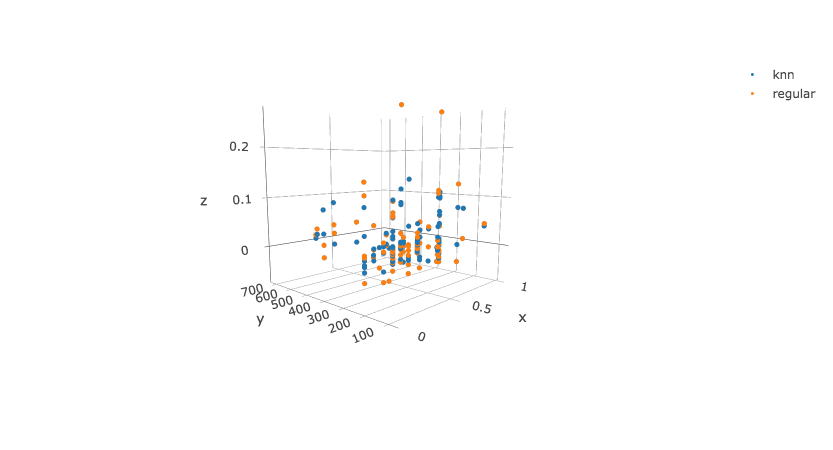

In [42]:
int = 1:100
ta = pty.scatter3d(x=xp[int], y=yp[int], z=z1[int], mode="markers", name="knn", marker_size=3)
tb = pty.scatter3d(x=xp[int], y=yp[int], z=z2[int], mode="markers", name="regular", marker_size=3)
pty.plot([ta, tb], pty.Layout(title="KNN vs))

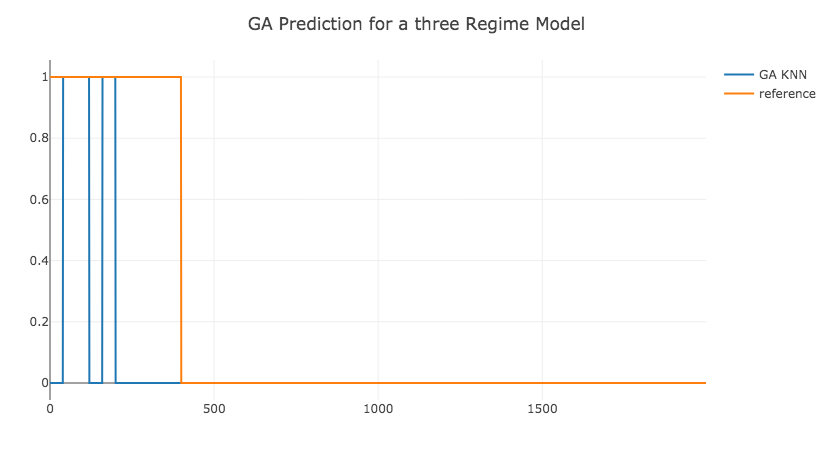

In [461]:
scores = scorefunction(pop)
best = pop[sortperm(scores, rev=true)[1]];
tracepred = pty.scatter(;y=Int64.(activate(best)), name="GA KNN")
traceref = pty.scatter(;y=Int64.(reference), name="reference")
pty.plot([tracepred, traceref], pty.Layout(title="GA Prediction for a three Regime Model"))

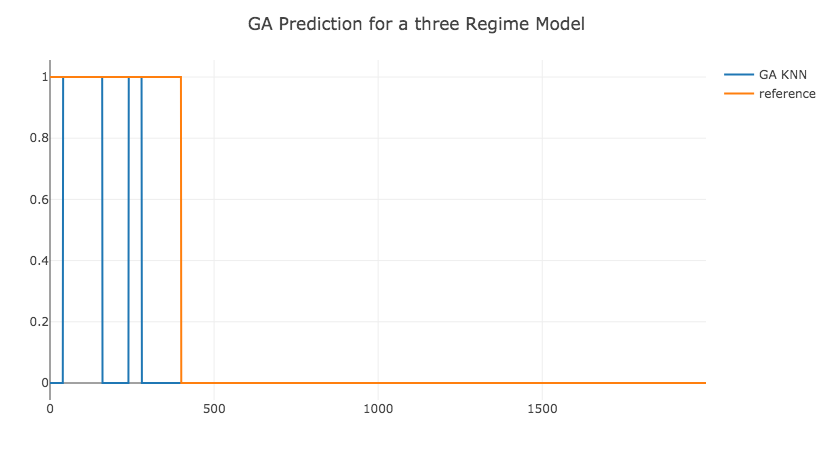

In [408]:
scores = scorefunction(pop)
best = pop[sortperm(scores, rev=true)[1]];
tracepred = pty.scatter(;y=Int64.(activate(best)), name="GA KNN")
traceref = pty.scatter(;y=Int64.(reference), name="reference")
pty.plot([tracepred, traceref], pty.Layout(title="GA Prediction for a three Regime Model"))

In [259]:
df = getmetrics(knn, "15 CV")
df = getmetrics(knn , "KNN", df)

UndefVarError: UndefVarError: knn not defined

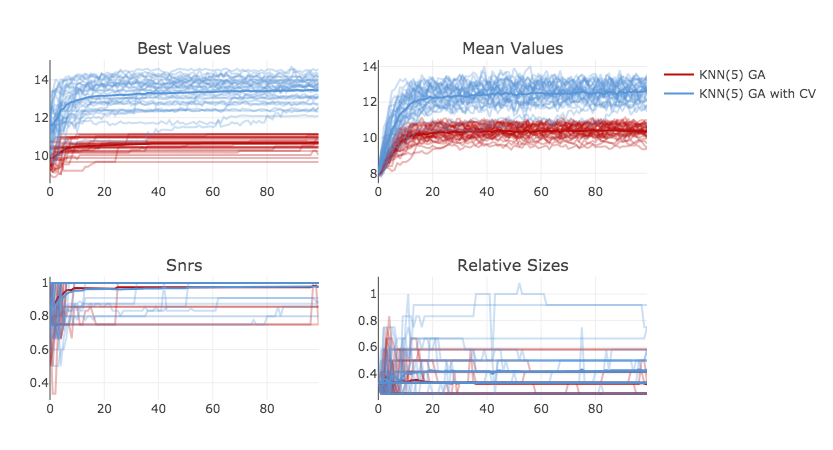

In [117]:
compare_states(knn, knn_cv, "KNN(5) GA", "KNN(5) GA with CV")

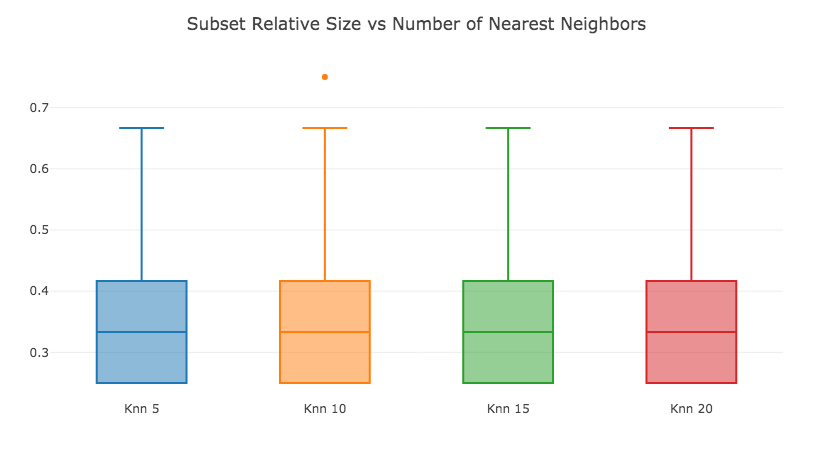

In [224]:
vec = [knn_res20, knn_res40, knn_res51];
names = ["1 ","5%","10%", "15%", "20%"]
names = ["KNN 5- Restart 20","KNN 5- Restart 20","KNN 5- Restart 51"]
bloxplot(vec, names, "sizes", "Subset Relative Size vs Number of Generations Until Restart")

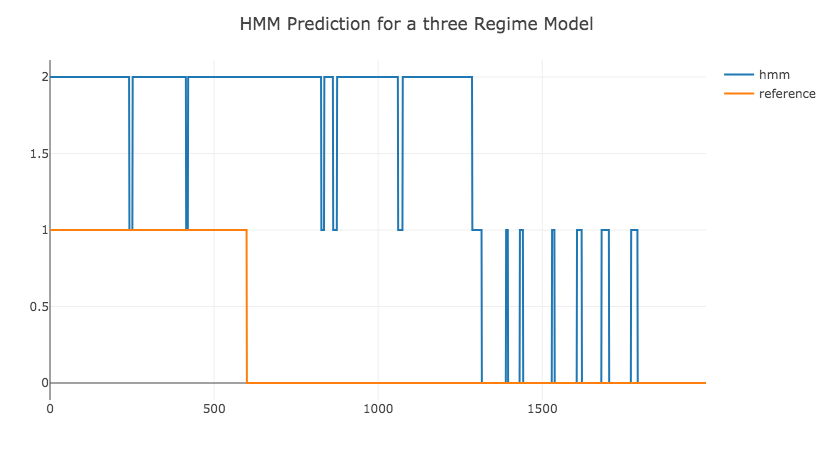

In [153]:
using PyCall
signal = [ar1(600);wn2(700);wn(700+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
hmm = pyimport("hmmlearn.hmm")
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100);
model.fit(x)
tracepred = pty.scatter(;y=model.predict(x), name="hmm")
traceref = pty.scatter(;y=Int64.(reference), name="reference")
pty.plot([tracepred, traceref], pty.Layout(title="HMM Prediction for a three Regime Model"))

In [547]:
signal = [ar1(600);wn2(700);wn(700+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
bicloss(loss, interval) = log(active(interval)) - 5*log(loss)
lasso = BicLassoModel();
model = lasso;
prevloss = bicloss;
pipe = Pipeline(model, mse, ytransform=normtransform(), originalspace=false);
algo = Algorithm(prevloss, minsamples=100, k=1);
scorefunction = training(x, y, algo, pipe);
evolsettings = EvolSettings(;pressure=2, mutation_p=10, crossover_p=85, elitism=1);
gasettings = GA(size(x,1);minsamples=121, groupsize=40);

# signal = [ar1(600);wn2(700);wn(700+windowsize, 6)]
# x, y, reference = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe);
# snr30 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference, knn=5, restart=51);

# signal = [ar1(400);wn2(800);wn(800+windowsize, 6)]
# x, y, reference = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe);
# snr20 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference, knn=5, restart=51);

# signal = [ar1(200);wn2(900);wn(900+windowsize, 6)]
# x, y, reference = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe);
# snr10 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference, knn=5, restart=51);

# signal = [wn2(1000);wn(1000+windowsize, 6)]
# x, y, reference0 = make_x_y_ref(signal, windowsize);
# scorefunction = training(x, y, algo, pipe);
# snr0 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference0, knn=5, restart=51);


signal = [ar1(1000);wn2(500);wn(500+windowsize, 6)]
x, y, reference50 = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
snr50 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference50, knn=5, restart=51);

signal = [ar1(1400);wn2(300);wn(300+windowsize, 6)]
x, y, reference70 = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
snr70 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference70, knn=5, restart=51);

signal = [ar1(1800);wn2(100);wn(100+windowsize, 6)]
x, y, reference90 = make_x_y_ref(signal, windowsize);
scorefunction = training(x, y, algo, pipe);
snr90 = benchaggr_(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference90, knn=5, restart=51);

Computing...100%|███████████████████████████████████████| Time: 0:01:33
Computing...100%|███████████████████████████████████████| Time: 0:01:43
Computing...100%|███████████████████████████████████████| Time: 0:01:44
Computing...100%|███████████████████████████████████████| Time: 0:01:38
Computing...100%|███████████████████████████████████████| Time: 0:01:37
Computing...100%|███████████████████████████████████████| Time: 0:01:34
Computing...100%|███████████████████████████████████████| Time: 0:01:35
Computing...100%|███████████████████████████████████████| Time: 0:01:34
Computing...100%|███████████████████████████████████████| Time: 0:01:36
Computing...100%|███████████████████████████████████████| Time: 0:01:38
Computing...100%|███████████████████████████████████████| Time: 0:01:40
Computing...100%|███████████████████████████████████████| Time: 0:01:37
Computing...100%|███████████████████████████████████████| Time: 0:01:37
Computing...100%|███████████████████████████████████████| Time: 

In [549]:
df = getaggmetrics(snr90, reference90, "SNR 90")
df = getaggmetrics(snr70, reference70, "SNR 70", df)
df = getaggmetrics(snr50, reference50, "SNR 50", df)
df = getaggmetrics(snr30, reference30, "SNR 30", df)
df = getaggmetrics(snr20, reference20, "SNR 20", df)
df = getaggmetrics(snr10, reference10, "SNR 10", df)
df

6×3 DataFrame
│ Row │ Name   │ AverageSNR │ AverageRelativeSize │
│     │ String │ Float64    │ Float64             │
├─────┼────────┼────────────┼─────────────────────┤
│ 1   │ SNR 90 │ 0.257119   │ 0.54                │
│ 2   │ SNR 70 │ 0.55103    │ 0.624444            │
│ 3   │ SNR 50 │ 0.537352   │ 0.671111            │
│ 4   │ SNR 30 │ 0.946522   │ 0.78                │
│ 5   │ SNR 20 │ 0.841843   │ 0.711111            │
│ 6   │ SNR 10 │ 0.455111   │ 0.68                │

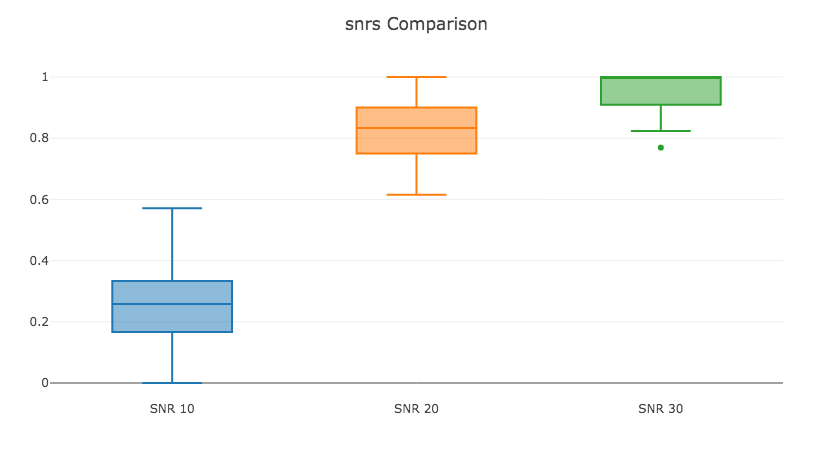

In [520]:
intervalsvec = [snr10, snr20, snr30, snr50, snr70, snr90]
names = ["SNR 10", "SNR 20", "SNR 30","SNR 50", "SNR 70", "SNR 90"] 
references = [reference10, reference20, reference30, reference50, reference70, reference90]
aggrbloxplot(intervalsvec, references, names, "snrs" ,"Subset SNR by Dataset SNR")

In [395]:
signal = [wn2(1000);wn(1000+windowsize, 6)]
x, y, reference = make_x_y_ref(signal, windowsize);
bicloss(loss, interval) = log(active(interval)) - 5*log(loss)
lasso = BicLassoModel();
model = lasso;
prevloss = bicloss;
pipe = Pipeline(model, mse, ytransform=normtransform(), originalspace=false);
algo = Algorithm(prevloss, minsamples=100, k=1);
scorefunction = training(x, y, algo, pipe);
evolsettings = EvolSettings(;pressure=2, mutation_p=10, crossover_p=85, elitism=1);
gasettings = GA(size(x,1);minsamples=121, groupsize=40);
# oie = aggr(40, 100, init_genes, scorefunction, gasettings, evolsettings, reference=reference, knn=5, restart=51);

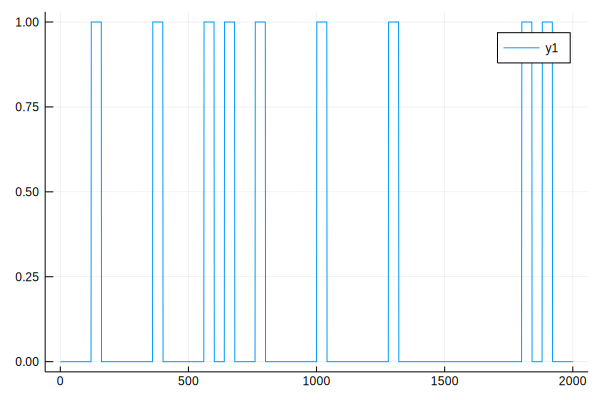

In [534]:
plt.plot(snr10[5, :])


In [521]:
using DataFrames

function getaggvalues_(intervals, reference, metric::Union{String, Nothing}=nothing)
    n = size(intervals, 1)
    sizes = Array{Float64}(undef, n)
    snrs = Array{Float64}(undef, n)
    for i in 1:n
        snrs[i], sizes[i] = snr_size(intervals[i, :], reference)
    end
    metric == "snrs" && return snrs
    metric == "sizes" && return sizes
    return snrs, sizes
end


function getaggmetrics(intervals, reference, name::String, df::Union{Nothing, DataFrame}=nothing)
    if df == nothing
        df = DataFrame(Name=String[], AverageSNR=Float64[], AverageRelativeSize=Float64[])
    end
    snrs, sizes = getaggvalues_(intervals)
    push!(df, (name, mean(snrs), mean(sizes)))
end

function aggrbloxplot(intervals, references,names::Vector{String}, metric::String, title::String="$metric Comparison")
    graphvalues = [getaggvalues_(interval, ref, metric) for (interval, ref) in zip(intervals, references)]
    boxes = [pty.box(;y=values, name=name) for (values, name) in zip(graphvalues, names)]
    pty.plot(boxes, pty.Layout(title=title, showlegend=false))
end

aggrbloxplot (generic function with 4 methods)

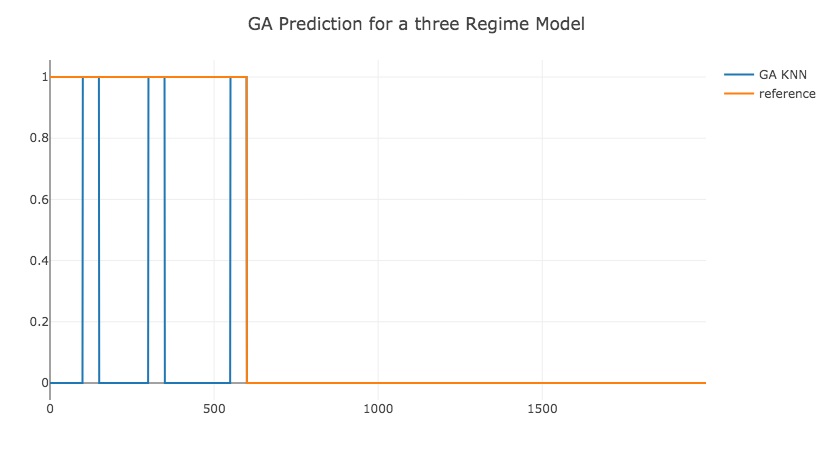

In [195]:
scores = scorefunction(pop)
best = pop[sortperm(scores, rev=true)[1]];
tracepred = pty.scatter(;y=Int64.(activate(best)), name="GA KNN")
traceref = pty.scatter(;y=Int64.(reference), name="reference")
pty.plot([tracepred, traceref], pty.Layout(title="GA Prediction for a three Regime Model"))